In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
%matplotlib inline

In [3]:
data = pd.read_csv('bills93-113.csv')

/Users/Jade/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (6,11,13,21,23,30,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(227595, 59)

In [4]:
data.columns

Index([u'id', u'BillID', u'BillNum', u'BillType', u'ByReq', u'Chamber',
       u'Commem', u'Cong', u'Cosponsr', u'IntrDate', u'Major', u'Minor',
       u'oldMajor', u'oldMinor', u'Month', u'Mult', u'MultNo', u'PassH',
       u'PassS', u'PLaw', u'PLawDate', u'PLawNum', u'Private', u'ReferArr',
       u'ReportH', u'ReportS', u'Title', u'Veto', u'Year', u'Age', u'Class',
       u'ComC', u'ComR', u'CumHServ', u'CumSServ', u'Delegate', u'District',
       u'DW1', u'DW2', u'FrstConH', u'FrstConS', u'Gender', u'LeadCham',
       u'LeadComm', u'LeadSubC', u'Majority', u'MemberID', u'MRef',
       u'NameFirst', u'NameFull', u'NameLast', u'Party', u'PooleID', u'Postal',
       u'State', u'ChRef', u'RankRef', u'SubChRef', u'SubRankRef'],
      dtype='object')

In [5]:
data['PartyName']= data['Party'].map({0.0:'R', 100.0: 'D', 200.0:'R', 328.0:'I'})

# Plots

### Differences in bill authorship by party 

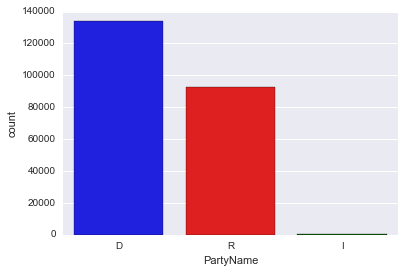

In [16]:
sn.countplot(x= 'PartyName' , data= data,  palette={'D':'Blue', 'R':'Red', 'I':'Green'} )

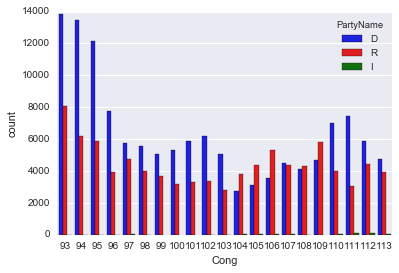

In [18]:
sn.countplot(x="Cong", hue="PartyName", data=data, palette={'D':'Blue', 'R':'Red', 'I':'Green'},);

In [19]:
data.groupby('PLaw').count()

,id,BillID,BillNum,BillType,ByReq,Chamber,Commem,Cong,Cosponsr,IntrDate,...,NameLast,Party,PooleID,Postal,State,ChRef,RankRef,SubChRef,SubRankRef,PartyName
PLaw,,,,,,,,,,,,,,,,,,,,,
0.0,218727,218727,218727,218727,210100,218727,218727,218727,209942,218727,...,218724,218570,218727,218569,218668,218557,218562,218562,218562,218473
1.0,8867,8867,8867,8867,8585,8867,8867,8867,8578,8867,...,8867,8863,8867,8860,8866,8859,8859,8859,8859,8861


In [30]:
subset = data[['Cong','PLaw','BillID','PartyName']]
subset.pivot_table(index=['Cong','PartyName'], columns='PLaw', aggfunc='count')

BillID       
PLaw                0.0    1.0
Cong PartyName                
93   D          13386.0  482.0
     I              6.0    NaN
     R           7969.0   85.0
94   D          13049.0  451.0
     I              5.0    1.0
     R           6127.0   75.0
95   D          11685.0  496.0
     I              3.0    NaN
     R           5792.0   69.0
96   D           7327.0  459.0
     I              5.0    NaN
     R           3859.0   71.0
97   D           5565.0  207.0
     I             29.0    NaN
     R           4630.0  150.0
98   D           5283.0  257.0
     I             13.0    3.0
     R           3817.0  165.0
99   D           4804.0  234.0
     R           3529.0  130.0
100  D           4904.0  390.0
     R           3137.0   78.0
101  D           5571.0  341.0
     R           3258.0   78.0
102  D           5837.0  354.0
     I             12.0    NaN
     R           3337.0   62.0
103  D           4775.0  309.0
     I             14.0    NaN
     R           2728.0   53.0
104  D           2667.0   51.0
     I             28.0    NaN
     R           3541.0  256.0
105  D           3079.0   54.0
     I             20.0    NaN
     R           4069.0  307.0
106  D           3480.0  112.0
     I             73.0    2.0
     R           4881.0  420.0
107  D           4374.0  100.0
     I             68.0    3.0
     R           4160.0  241.0
108  D           3955.0  143.0
     I             16.0    NaN
     R           3978.0  351.0
109  D           4603.0  116.0
     R           5491.0  348.0
110  D           6706.0  320.0
     I             25.0    NaN
     R           3906.0  124.0
111  D           7173.0  305.0
     I             84.0    5.0
     R           3008.0   54.0
112  D           5784.0   98.0
     I             81.0    3.0
     R           4297.0  170.0
113  D           4653.0  106.0
     I             73.0    2.0
     R           3744.0  170.0

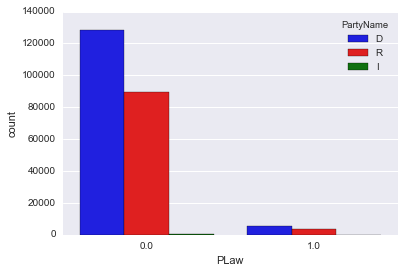

In [6]:
sn.countplot(x="PLaw", hue="PartyName", data=data, palette={'D':'Blue', 'R':'Red', 'I':'Green'},);